data: https://www.kaggle.com/datasets/andrewmvd/trip-advisor-hotel-reviews/code?resource=download

notebook: https://www.kaggle.com/code/ainurrohmanbwx/bi-gru-with-attention-on-sentiment-analysis

# Imports

In [1]:
#imports 
import pandas as pd
import numpy as np
from tqdm import tqdm
import time 

import matplotlib.pyplot as plt
import seaborn as sns

import re
#import contractions
from collections import Counter
import nltk
from nltk.corpus import stopwords
import unicodedata
import string
from string import digits

#disable some annoying warnings
import warnings
warnings.filterwarnings("ignore")

In [2]:
import torch
device = torch.device("mps")

#sanity check for gpu
if torch.backends.mps.is_available(): 
     device = torch.device("mps")
     x = torch.ones(1, device=device)
     print (x)
else:
     print ("MPS device not found.")

tensor([1.], device='mps:0')


# Data analysis

In [6]:
#read data
data = pd.read_csv('tripadvisor_hotel_reviews.csv', sep=',')
data.head()

,Review,Rating
0,nice hotel expensive parking got good deal sta...,4
1,ok nothing special charge diamond member hilto...,2
2,nice rooms not 4* experience hotel monaco seat...,3
3,"unique, great stay, wonderful time hotel monac...",5
4,"great stay great stay, went seahawk game aweso...",5


No null values found.


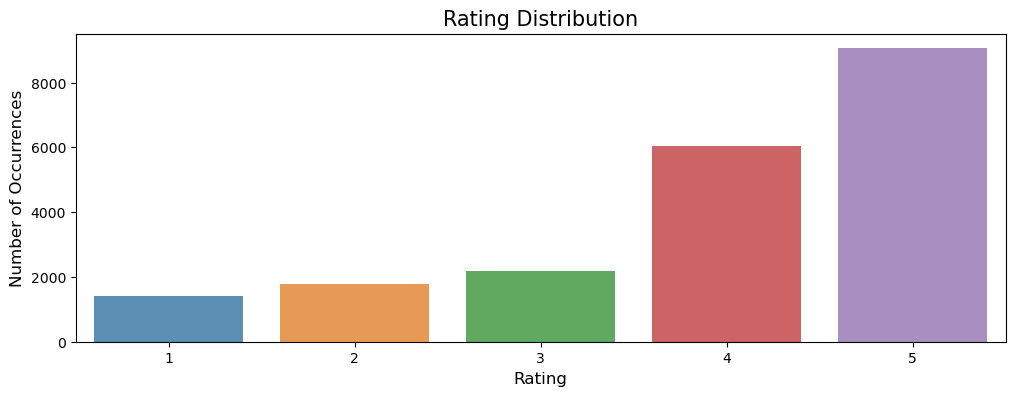

In [4]:
#plot label distribution
ratings = data['Rating'].value_counts()
plt.figure(figsize=(12,4))
sns.barplot(x=ratings.index, y=ratings.values, alpha=0.8)
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('Rating', fontsize=12)
plt.title('Rating Distribution', fontsize=15)
plt.show() #to-do: SMOTE on training set


# Preprocessing

In [8]:
def stopwords_remove_en(text):
    en_stop = stopwords.words('english')
    words = [w for w in text.split() if w not in en_stop]
    return ' '.join(words)

def remove_accented_chars(text):
    text = unicodedata.normalize('NFKD', text).encode('ascii', 'ignore').decode('utf-8','ignore')
    return text

def remove_punctuation_numbers(text):
    text = re.sub(" \d+", " ", text)
    translator = str.maketrans('', '', string.punctuation)
    return text.translate(translator)



In [9]:
def cleaning_pipeline(text): 
    text = text.lower()
    text = stopwords_remove_en(text) #PROBLEM: negations -> how to deal?
    text = remove_accented_chars(text)
    text = remove_punctuation_numbers(text).split()
    return text

In [32]:
cleaned_raw = [] #list of lists
for review in data['Review']:
    cleaned_raw.append(cleaning_pipeline(review))
 
    
for review in cleaned_raw:
    df = {"Raw words": cleaned_raw, "Review": data['Rating']}
    
raw_df = pd.DataFrame(df)  

{' ', 'R', 'a', 'd', 'e', 'i', 'o', 'r', 's', 'v', 'w'}